<h1 style="text-align: center"> Najdłuzszy wspólny podciąg (LCS)</h1>
<h3 style="text-align: center">Karol Studniarek</h3>

# WSTĘP

### Najdłuzszy wspólny podciąg 

    Najdłuższy wspólny podciąg, nazywany również LCS (od ang. Longest Common Subsequence) to jeden z fundamentalnych problemów informatyki, który polega na znalezieniu najdłuższego ciągu elementów, który występuje w dwóch (lub więcej) innych ciągach. Innymi słowy, LCS to najdłuższy podciąg, który występuje zarówno w pierwszym, jak i drugim ciągu, przy czym nie musi być on ciągiem spójnym.


### Przykłady:

    Dla ciągów ABAABBAAA i BABAB ich NWP to BABA i ABAB.
    Dla ciągów POLITECHNIKA i TOALETA ich NWP to OLTA i OLEA.
    Dla ciągów 123 oraz 543 ich NWP to 3.

### Rodzaje problemów:

    Warto przy tym zaznaczyć, że implementacja rozwiązania problemu może dotyczyć zarówno ciągu rozumianego jako ciąg liter, wyrazów czy nawet akapitów.

    Jednak ja w tym przypadku skupię się na ciągu znaków. 

# IMPLEMENTACJA PROBLEMU 

## Algorytm genetyczny

##### Przykład 1

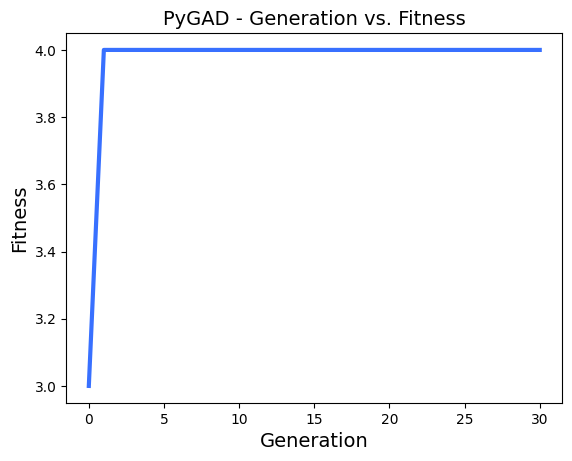

Fitness value of the best solution = 4
Sequence of the best solution : ['O', 'L', 'T', 'A']
Time:  0.09571099281311035


In [9]:
import pygad 
import time 

seq1 = ['P','O','L','I','T','E','C','H','N','I','K','A']
seq2 = ['T', 'O','A','L','E','T','A']

def parseToInt(uniq):
    final_gene_space=[]
    for i in uniq:
        final_gene_space.append(ord(i))
    return final_gene_space
    
    
def remove_duplicates(gene_space):
    uniq = []
    for i in gene_space:
        if i not in uniq:
            uniq.append(i)
    return uniq

def prepare(gene_space):
    return parseToInt(remove_duplicates(gene_space))

# gene_space to litery alfabetu które istnieją w obu sekwencjach
gene_space = prepare(seq1+seq2)

# num_genes to długość krótszej sekwencji, ponieważ długość wspólnej sekwencji nie będzie dłuższa niż krótsze ze słów
num_genes = (len(seq2) if len(seq1) > len(seq2) else len(seq1))

sol_per_pop = 200
num_parents_mating = 100
num_generations = 30
keep_parents = 50

parent_selection_type = "sss"
mutation_type = "random"
mutation_percent_genes = 10
crossover_type = "single_point"

# funkcja bierze solution i 2 sekwencje a następnie sprawdza jaka ilosc liter (solution) występuje w obu sekwencjach
# funkcja sprawdza solution od początku do końca
# jeśli kolejna litera w solution nie występuje w obu sekwencjach to funkcja zwraca długośc solution od początku która jest wspólna
# dla obu sekwencji
def cut(solution, seq1, seq2):
    acc = []
    def helper(solution,seq1,seq2,acc):
        if len(solution) == 0 or len(seq1) == 0 or len(seq2) == 0:
            return acc
        if solution[0] == seq1[0] and solution[0] == seq2[0]:
            acc.append(solution[0])
            return helper(solution[1:], seq1[1:], seq2[1:], acc)
        elif solution[0] == seq1[0] and solution[0] != seq2[0]:
            return helper(solution, seq1, seq2[1:], acc)
        elif solution[0] != seq1[0] and solution[0] == seq2[0]:
            return helper(solution, seq1[1:], seq2, acc)
        else:
            return helper(solution, seq1[1:], seq2[1:], acc)
        
    lcs = helper(solution, seq1, seq2, acc)
    return len(lcs)

# funkcja zmienia solution listę liter i wywołuje funkcję cut
def fitness_func(solution, solution_idx):
    solution = [chr(int(i)) for i in solution]
    return cut(solution, seq1, seq2)

   
start = time.time()
ga_instance = pygad.GA(num_generations=num_generations,
                          num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,
                            
                            )

ga_instance.run()
end = time.time()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

# zamiana liczby na znaki
solution = solution.tolist()
for i in range(len(solution)):
    solution[i] = chr(int(solution[i]))

# ucięcie solution do długości najdłuższej wspólnej sekwencji, reszte usuwamy bo tylko zajmuje miejsce na chromosomie którego dlugość jest stała

solution = solution[:solution_fitness]
print("Sequence of the best solution : {solution}".format(solution=solution))
print("Time: ", end - start)

    Powyższy problem ma 2 rozwiązania:
    ['O', 'L', 'T', 'A']
    ['O', 'L', 'E', 'A']


##### Przykład 2

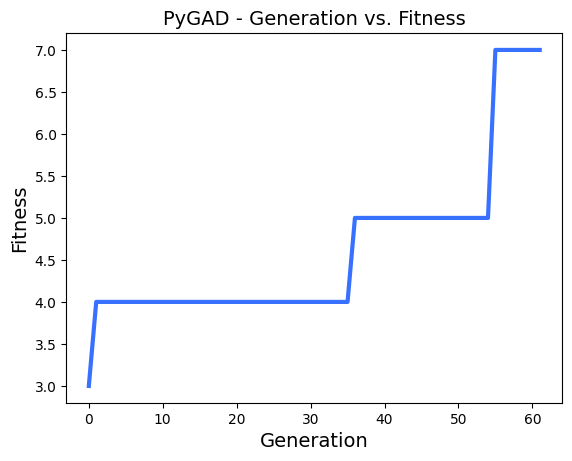

Parameters of the best solution : [65. 73. 84. 73. 84. 73. 79.]
Fitness value of the best solution = 7
Sequence of the best solution : ['A', 'I', 'T', 'I', 'T', 'I', 'O']
Time:  0.13980793952941895


In [10]:
import time
seq1 = [i.upper() for i in "dynamic"]
seq2 = [i.upper() for i in "determin"]
seq1 = [i.upper() for i in "longest"]
seq2 = [i.upper() for i in "solution"]
seq1 = [i.upper() for i in "matplotslibplt"]
seq2 = [i.upper() for i in "plotterscostut"]
seq1 = [i.upper() for i in "AlgorithmVisualizations"]
seq2 = [i.upper() for i in "AnimationSpeedGeneticLos"]

gene_space = prepare(seq1+seq2)

length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
num_genes = length

sol_per_pop = 400
num_parents_mating = 200
keep_parents = 100
num_generations = 200

# poprzednie
# sol_per_pop = 200
# num_parents_mating = 100
# num_generations = 30
# keep_parents = 50

mutation_percent_genes = 14 # poprzednie 10



def fitness_func(solution, solution_idx):
    solution = [chr(int(i)) for i in solution]
    return  cut(solution, seq1, seq2)

   
start = time.time()
ga_instance.run()
end = time.time()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

solution = [chr(int(i)) for i in solution]

solution = solution[:solution_fitness]
print("Sequence of the best solution : {solution}".format(solution=solution))
print("Time: ", end - start)



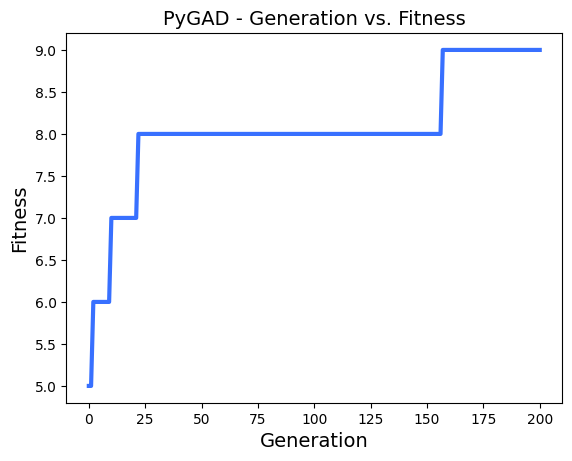

Parameters of the best solution : [65. 76. 65. 77. 75. 79. 80. 83. 65. 75. 76. 78. 65. 73.]
Fitness value of the best solution = 9
Sequence of the best solution : ['A', 'L', 'A', 'M', 'K', 'O', 'P', 'S', 'A']
Time:  5.089910984039307


In [11]:
# min length = 13
seq1 = [i.upper() for i in "alamakotaipsa"]

seq2 = [i.upper() for i in "alaniemakotpsa"]

gene_space = prepare(seq1+seq2)

length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
num_genes = length

sol_per_pop = 800  
num_parents_mating = 400 
keep_parents = 200  
num_generations = 200 

# poprzednie 
# sol_per_pop = 400
# num_parents_mating = 200
# keep_parents = 100
# num_generations = 200


def fitness_func(solution, solution_idx):
    solution = solution.tolist()
    solution = [chr(int(i)) for i in solution]
    return cut(solution, seq1, seq2)

   
start = time.time()
ga_instance = pygad.GA(num_generations=num_generations,
                          num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,
                            stop_criteria='reach_15' # dodajemy
                            )

ga_instance.run()
end = time.time()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

solution = [chr(int(i)) for i in solution]

solution = solution[:solution_fitness]
print("Sequence of the best solution : {solution}".format(solution=solution))
print("Time: ", end - start)

    Niestety nie znaleźliśmy w tym przykładzie idealnego rozwiązania którego długośc wynosi 11. Wielokrotne próby na innych danych populacji nie przyniosły rezultatu, nie przekraczając czasu wykonania programu 20 sekund. (reszta prób nie została przedstawiona w tym dokumencie)

##### Przykład 3

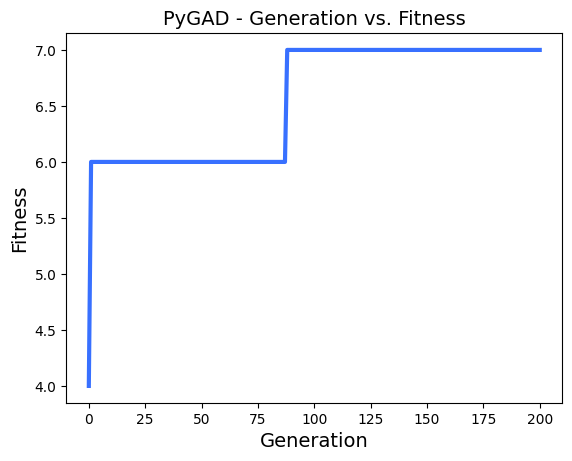

Parameters of the best solution : [65. 76. 65. 77. 75. 79. 84. 76.]
Fitness value of the best solution = 7
Sequence of the best solution : ['A', 'L', 'A', 'M', 'K', 'O', 'T']
Time:  4.402709007263184


In [12]:
# min length 8
seq1 = [i.upper() for i in "alamakot"]
seq2 = [i.upper() for i in "alanmkot"]

gene_space = prepare(seq1+seq2)

length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
num_genes = length

def fitness_func(solution, solution_idx):
    solution = solution.tolist()
    solution = [chr(int(i)) for i in solution]
    return cut(solution, seq1, seq2)

   
start = time.time()
ga_instance = pygad.GA(num_generations=num_generations,
                          num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,
                            stop_criteria='reach_15'
                            )

ga_instance.run()
end = time.time()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

solution = [chr(int(i)) for i in solution]

solution = solution[:solution_fitness]
print("Sequence of the best solution : {solution}".format(solution=solution))
print("Time: ", end - start)


    Tutaj jednak od razu widać. że znaleźlismy rozwiazanie problemu. Więc trzeba sprawdzić czy długośc ma znaczenie.

##### Przykład 4

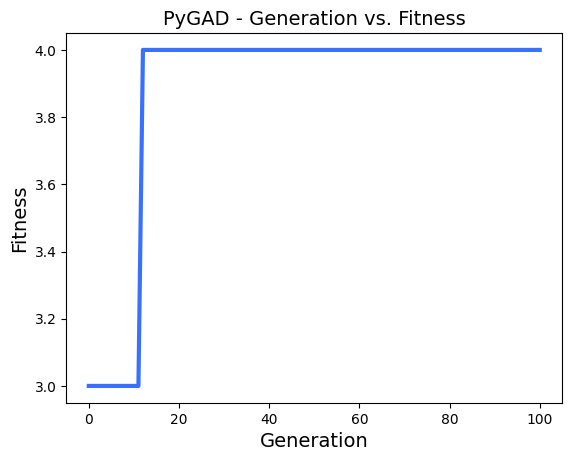

Parameters of the best solution : [78. 67. 79. 77. 67. 82. 69. 89. 79. 69. 73. 84. 71. 79.]
Fitness value of the best solution = 4
Sequence of the best solution : ['N', 'C', 'O', 'M']
Time:  1.783806324005127


In [13]:
# min length 13
seq1 = [i.upper() for i in "ynamicProgram"]
seq2 = [i.upper() for i in "ongestCommonSu"]

gene_space = prepare(seq1+seq2)
length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
num_genes = length

# zmienione
sol_per_pop = 600
num_parents_mating = 300
num_generations = 100
keep_parents = 150

# poprzednie
# sol_per_pop = 800
# num_parents_mating = 400
# keep_parents = 200
# num_generations = 200


def fitness_func(solution, solution_idx):
    solution = solution.tolist()
    solution = [chr(int(i)) for i in solution]
   
    return cut(solution, seq1, seq2)

   
start = time.time()
ga_instance = pygad.GA(num_generations=num_generations,
                          num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,
                            stop_criteria='reach_15'
                    
                            )

ga_instance.run()
end = time.time()

ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

solution = [chr(int(i)) for i in solution]

solution = solution[:solution_fitness]
print("Sequence of the best solution : {solution}".format(solution=solution))
print("Time: ", end - start)

    W tym przypadku długośc najkrótszego łańcucha jest równa 13 tak jak dla przykładu 2. Więc w tym przypadku nie ma znaczenia długośc łańcucha.


## EFEKTYWNOŚĆ

In [14]:

import time

small_inputs = [
  [
    [i.upper() for i in "alamakot"], # długość = 7
    [i.upper() for i in "alanmkot"] # długość = 8
  ],
  [
    [i.upper() for i in "dynamic"],
    [i.upper() for i in "determin"]
  ],
  [
    [i.upper() for i in "longest"],
    [i.upper() for i in "solution"]
  ],
]


middle_inputs = [
  [ 
    [i.upper() for i in "alamakotaipsa"], # długość = 13
    [i.upper() for i in "alaniemakotpsa"] # długość = 14
  ],
  [
    [i.upper() for i in "ynamicProgram"],
    [i.upper() for i in "ongestCommonSu"]
  ],
  [   
    [i.upper() for i in "matplotslibplt"],
    [i.upper() for i in "plotterscostut"]
  ],  
]

big_inputs = [
  [
    [i.upper() for i in "AlgorithmVisualizations"], # długość = 23
    [i.upper() for i in "AnimationSpeedGeneticLos"] # długość = 24
  ],
  [
    [i.upper() for i in "AnalysisofEvolutionaryA"],
    [i.upper() for i in "fortheLongestCommonSubse"]
  ],
  [
    [i.upper() for i in "BrokenPipeErrorfilename"],
    [i.upper() for i in "LookupErrorpygaddatafile"]
  ],
]



In [15]:
import random


times = []
solutions = 0
for i in range(100):
    
    random_num = random.randint(0,2)


    seq1 = small_inputs[random_num][0]
    seq2 = small_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 7
    elif random_num == 1:
        proper_length = 3 
    else:
        proper_length = 3
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length
    
    sol_per_pop = 400
    num_parents_mating = 200
    keep_parents = 100
    num_generations = 100
    mutation_percent_genes = 15
    mutation_type = "random"
    crossover_type = "single_point"
    parent_selection_type = "sss"


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,                    
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))



Proper solutions: 94/100
Average time:  0.8221725276175965


In [16]:
import random


times = []
solutions = 0
for i in range(100):
    
    random_num = random.randint(0,2)


    seq1 = small_inputs[random_num][0]
    seq2 = small_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random == 0:
        proper_length = 7
    elif random == 1:
        proper_length = 3 
    else:
        proper_length = 3
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length
    
    sol_per_pop = 800
    num_parents_mating = 400
    keep_parents = 200
    num_generations = 200
    mutation_percent_genes = 15
    mutation_type = "random"
    crossover_type = "single_point"
    parent_selection_type = "sss"


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,                    
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))

Proper solutions: 61/100
Average time:  4.637444543056801


In [17]:
import random


times = []
solutions = 0
for i in range(100):
    
    random_num = random.randint(1,2)


    seq1 = small_inputs[random_num][0]
    seq2 = small_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random == 1:
        proper_length = 3 
    else:
        proper_length = 3
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length
    
    sol_per_pop = 400
    num_parents_mating = 200
    keep_parents = 100
    num_generations = 100
    mutation_percent_genes = 15
    mutation_type = "random"
    crossover_type = "single_point"
    parent_selection_type = "sss"


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,                    
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))

Proper solutions: 100/100
Average time:  0.839730486869812


In [18]:
# middle outputs

import random


times = []
solutions = 0
for i in range(100):
    
    random_num = random.randint(0,2)


    seq1 = middle_inputs[random_num][0]
    seq2 = middle_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 11
    elif random_num == 1:
        proper_length = 4
    else:
        proper_length = 6
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length
    
    sol_per_pop = 400
    num_parents_mating = 200
    keep_parents = 100
    num_generations = 50
    mutation_percent_genes = 13
    mutation_type = "random"
    crossover_type = "single_point"
    parent_selection_type = "sss"


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type, 
                            stop_criteria=f"reach_{proper_length}"                   
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()


    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
    
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))

Proper solutions: 49/100
Average time:  0.1440649178563332


In [19]:
# middle outputs

import random


times = []
solutions = 0
for i in range(100):
    
    random_num = random.randint(1,2)


    seq1 = middle_inputs[random_num][0]
    seq2 = middle_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 1:
        proper_length = 4
    else:
        proper_length = 6
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length
    
    sol_per_pop = 400
    num_parents_mating = 200
    keep_parents = 100
    num_generations = 100
    mutation_percent_genes = 13
    mutation_type = "random"
    crossover_type = "single_point"
    parent_selection_type = "sss"


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,                    
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))

Proper solutions: 77/100
Average time:  1.0455564647525937


In [22]:
# long inputs

import random

times = []
solutions = 0

sol_per_pop = 400
num_parents_mating = 200
keep_parents = 100
num_generations = 100
mutation_percent_genes = 13
mutation_type = "random"
crossover_type = "single_point"
parent_selection_type = "sss"

for i in range(100):
    
    random_num = random.randint(0,2)


    seq1 = small_inputs[random_num][0]
    seq2 = small_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 9
    elif random_num == 1:
        proper_length = 5
    else:
        proper_length = 12
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,                    
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))


Proper solutions: 0/100


ZeroDivisionError: division by zero

In [23]:
# long inputs

import random

times = []
solutions = 0
for i in range(100):
    
    random_num = random.randint(0,2)


    seq1 = small_inputs[random_num][0]
    seq2 = small_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 9
    elif random_num == 1:
        proper_length = 5
    else:
        proper_length = 12
      
    gene_space = prepare(seq1+seq2)

    length = len(seq1) if len(seq1) > len(seq2) else len(seq2)
    num_genes = length
    
    sol_per_pop = 400
    num_parents_mating = 200
    keep_parents = 100
    num_generations = 200
    mutation_percent_genes = 13
    mutation_type = "random"
    crossover_type = "single_point"
    parent_selection_type = "sss"


    def fitness_func(solution, solution_idx):
        solution = [chr(int(i)) for i in solution]
        return cut(solution, seq1, seq2)
    
    start = time.time()
    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            gene_space=gene_space,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            crossover_type=crossover_type,                    
                            )
    
    ga_instance.run()
    end = time.time()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    if solution_fitness == proper_length:
        solutions += 1
        times.append(end - start)
        

print(f'Proper solutions: {solutions}/100', )
print("Average time: ", sum(times)/len(times))

Proper solutions: 0/100


ZeroDivisionError: division by zero

# Particle Swarm Optimizer(Rój cząstek)

##### Przykład 1

2023-04-03 10:29:13,516 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}


65


pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-4
2023-04-03 10:29:14,604 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -4.0, best pos: [76.493269   77.46868345 75.29040558 79.35921114 68.7909721  80.69875235
 75.26944556 79.24728451]


['L', 'M', 'K', 'O', 'D', 'P', 'K', 'O']
length 4.0
time 1.0927190780639648


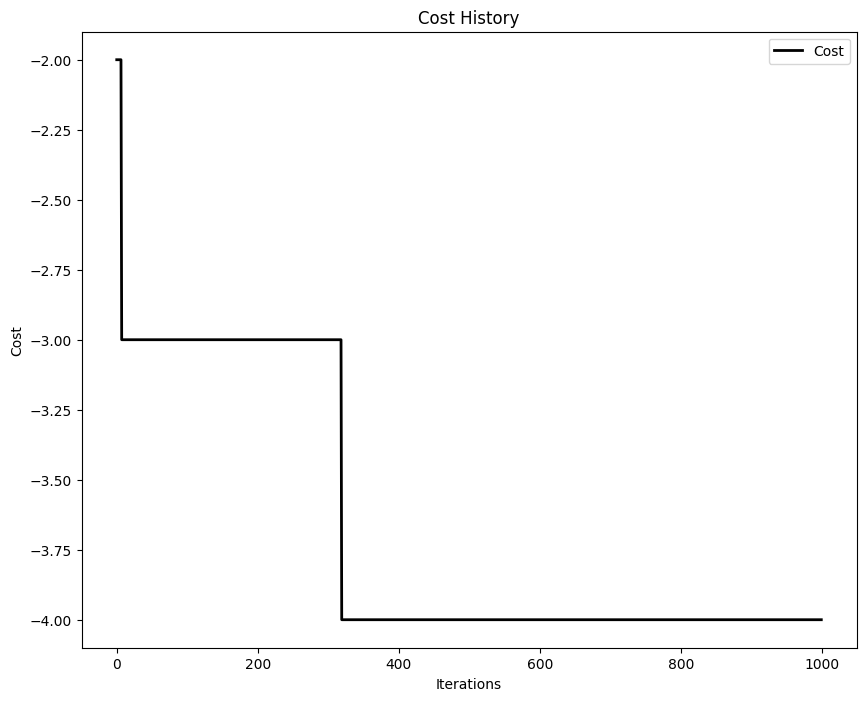

In [ ]:
import pyswarms as ps
import numpy as np
import time 
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history 

# te options dawały najlepsze wyniki 
options = {'c1': 0.6, 'c2': 0.3, 'w':0.9}

seq1 = ['P','O','L','I','T','E','C','H','N','I','K','A']
seq2 = ['T','O','A','L','E','T','A']
seq1 = small_inputs[0][0]
seq2 = small_inputs[0][1]

max = 0
for i in range(len(seq1)):
    # seq1[i] = ord(seq1[i])
    
    if seq1[i] > max:
        max = seq1[i]

for j in range(len(seq2)):
    # seq2[j] = ord(seq2[j])
    if seq2[j] > max:
        max = seq1[j]

min = ord('A')
for i in range(len(seq1)):
    if seq1[i] < min:
        min = seq1[i]
print(min)

for j in range(len(seq2)):
   
    if seq1[j] < min:
        min = seq1[j]

lenght = len(seq1) if len(seq1) < len(seq2) else len(seq2)
# jako ze największa długośc najdłuższego ciągu to długośc najkrótszego łancucha czyli w tym przypadku 7
# to tworzymy tablice 7 elementową z największymi wartościami
# i bedziemy mieli 7 wymiarów w przestrzeni
x_max = np.array([max]*lenght)
x_min = np.array([min]*lenght)

my_bounds = (x_min, x_max)


# funkcja fitness jest taka sama jak dla algorytmu genetycznego
# z rónicą, ze zwracamy koszt, co oznacza, ze im mniejszy koszt tym lepszy wynik
# więc zwracamy ujemną długośc najdłuższego wspólnego podciągu
def cut(solution):
    solution = [int(i) for i in solution]

    acc = []
    def helper(solution,seq1,seq2,aqq):
       
        if len(solution) == 0 or len(seq1) == 0 or len(seq2) == 0:
            return aqq
        if solution[0] == seq1[0] and solution[0] == seq2[0]:
            aqq.append(solution[0])
            return helper(solution[1:], seq1[1:], seq2[1:], aqq)
        elif solution[0] == seq1[0] and solution[0] != seq2[0]:
            return helper(solution, seq1, seq2[1:], aqq)
        elif solution[0] != seq1[0] and solution[0] == seq2[0]:
            return helper(solution, seq1[1:], seq2, aqq)
        else:
            return helper(solution, seq1[1:], seq2[1:], aqq)
    acum = helper(solution, seq1, seq2, acc)

    return -(len(acum))

def f(x):
    n_particles = x.shape[0]
    j = [cut(x[i]) for i in range(n_particles)]
    return np.array(j)
start = time.time()
optimizer = ps.single.GlobalBestPSO(n_particles=15, dimensions=8, options=options, bounds=my_bounds)

values =  optimizer.optimize(f, iters=1000)
end = time.time()

array = values[1]

array = [chr(int(i)) for i in array]
print(array)
print('length', -values[0])
print('time', end - start)

cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()



In [ ]:

import time

small_inputs = [
  [
    [i.upper() for i in "alamakot"],
    [i.upper() for i in "alanmkot"]
  ],
  [
    [i.upper() for i in "dynamico"],
    [i.upper() for i in "determin"]
  ],
  [
    [i.upper() for i in "longesty"],
    [i.upper() for i in "solution"]
  ],
]


middle_inputs = [
  [ 
    [i.upper() for i in "alamakotaipsa"],
    [i.upper() for i in "alaniemakotpsa"]
  ],
  [
    [i.upper() for i in "ynamicProgram"],
    [i.upper() for i in "ongestCommonSu"]
  ],
  [   
    [i.upper() for i in "matplotsliblt"],
    [i.upper() for i in "plotterscosut"]
  ],  
]

big_inputs = [
  [
    [i.upper() for i in "AlgorithmVisualizations"],
    [i.upper() for i in "AnimationSpeedGeneticLos"]
  ],
  [
    [i.upper() for i in "AnalysisofEvolutionaryA"],
    [i.upper() for i in "fortheLongestCommonSubse"]
  ],
  [
    [i.upper() for i in "BrokenPipeErrorfilename"],
    [i.upper() for i in "LookupErrorpygaddatafile"]
  ],
]



In [ ]:
import pyswarms as ps
import numpy as np
import time 
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history 

options = {'c1': 0.6, 'c2': 0.3, 'w':0.9}



times = []
solutions = 0 

for i in range(100):
    optimizer = None
    
    random_num = random.randint(0,2)


    seq1 = small_inputs[random_num][0]
    seq2 = small_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 7
    elif random_num == 1:
        proper_length = 3 
    else:
        proper_length = 3

    max = 0
    for i in range(len(seq1)):
        # seq1[i] = ord(seq1[i])
        if seq1[i] > max:
            max = seq1[i]

    for j in range(len(seq2)):
        # seq2[j] = ord(seq2[j])
        if seq2[j] > max:
            max = seq1[j]

    min = ord('A')
    for i in range(len(seq1)):
        if seq1[i] < min:
            min = seq1[i]
   
    

    for j in range(len(seq2)):
        if seq2[j] < min:
            min = seq1[j]

    lenght = len(seq1) if len(seq1) < len(seq2) else len(seq2)
   

    x_max = np.array([max]*lenght)
    x_min = np.array([min]*lenght)

    my_bounds = (x_min, x_max)

    def cut(solution):
        solution = [int(i) for i in solution]

        acc = []
        def helper(solution,seq1,seq2,aqq):
        
            if len(solution) == 0 or len(seq1) == 0 or len(seq2) == 0:
                return aqq
            if solution[0] == seq1[0] and solution[0] == seq2[0]:
                aqq.append(solution[0])
                return helper(solution[1:], seq1[1:], seq2[1:], aqq)
            elif solution[0] == seq1[0] and solution[0] != seq2[0]:
                return helper(solution, seq1, seq2[1:], aqq)
            elif solution[0] != seq1[0] and solution[0] == seq2[0]:
                return helper(solution, seq1[1:], seq2, aqq)
            else:
                return helper(solution, seq1[1:], seq2[1:], aqq)
        acum = helper(solution, seq1, seq2, acc)

        return -(len(acum))

    def f(x):
        n_particles = x.shape[0]
        j = [cut(x[i]) for i in range(n_particles)]
        return np.array(j)

    start = time.time()
    optimizer = ps.single.GlobalBestPSO(n_particles=15, dimensions=8, options=options, bounds=my_bounds)

    values =  optimizer.optimize(f, iters=1000)
    end = time.time()
    array = values[1]

    array = [chr(int(i)) for i in array]
    if int(-values[0]) == proper_length:
        solutions += 1
        times.append(end - start)


    # cost_history = optimizer.cost_history
    # plot_cost_history(cost_history)

print('solutions', solutions)
print('times', times)


2023-04-03 10:43:15,514 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-4
2023-04-03 10:43:16,567 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -4.0, best pos: [76.4464627  77.1389675  75.6851585  79.44777765 71.81233881 79.17216792
 75.02252712 74.58333305]
2023-04-03 10:43:16,585 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-3
2023-04-03 10:43:17,637 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -3.0, best pos: [65.28667709 76.69963877 77.88954326 67.99377806 71.09265061 72.03854027
 76.38464056 78.278538  ]
2023-04-03 10:43:17,646 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_

solutions 54
times [0.8764300346374512, 0.9823899269104004, 0.6456120014190674, 0.9412128925323486, 0.8710410594940186, 0.7448928356170654, 0.7946369647979736, 0.8990368843078613, 0.8696761131286621, 0.8040499687194824, 0.815838098526001, 0.7679431438446045, 0.7835361957550049, 0.8131909370422363, 0.7557418346405029, 0.7295379638671875, 0.8182530403137207, 0.6934750080108643, 0.7962591648101807, 0.7802350521087646, 0.8142101764678955, 0.78456711769104, 0.8560078144073486, 0.8361990451812744, 0.684194803237915, 0.8777170181274414, 0.8453848361968994, 0.7180180549621582, 0.7731142044067383, 0.8339748382568359, 0.8848252296447754, 0.8318989276885986, 0.8776941299438477, 0.8915209770202637, 0.8952569961547852, 0.9698581695556641, 1.0883300304412842, 0.7408661842346191, 0.9752929210662842, 0.8871810436248779, 0.7050521373748779, 0.8763930797576904, 0.8967947959899902, 0.9642419815063477, 0.8116469383239746, 0.7233102321624756, 0.8591048717498779, 0.8997390270233154, 1.00565505027771, 0.6507

In [ ]:
print('average time', sum(times)/len(times))
print(f"proper solutions: {solutions}/100") 

average time 0.8394663687105532
proper solutions: 54/100


In [ ]:
# middle inputs

import pyswarms as ps
import numpy as np
import time 
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history 

options = {'c1': 0.6, 'c2': 0.3, 'w':0.9}



times = []
solutions = 0 

for i in range(100):
    optimizer = None
    
    random_num = random.randint(0,2)


    seq1 = middle_inputs[random_num][0]
    seq2 = middle_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 7
    elif random_num == 1:
        proper_length = 3 
    else:
        proper_length = 3

    max = 0
    for i in range(len(seq1)):
        # seq1[i] = ord(seq1[i])
        if seq1[i] > max:
            max = seq1[i]

    for j in range(len(seq2)):
        # seq2[j] = ord(seq2[j])
        if seq2[j] > max:
            max = seq1[j]

    min = ord('A')
    for i in range(len(seq1)):
        if seq1[i] < min:
            min = seq1[i]
   
    

    for j in range(len(seq2)):
        if seq2[j] < min:
            min = seq1[j]

    lenght = len(seq1) if len(seq1) < len(seq2) else len(seq2)
   

    x_max = np.array([max]*lenght)
    x_min = np.array([min]*lenght)

    my_bounds = (x_min, x_max)

    def cut(solution):
        solution = [int(i) for i in solution]

        acc = []
        def helper(solution,seq1,seq2,aqq):
        
            if len(solution) == 0 or len(seq1) == 0 or len(seq2) == 0:
                return aqq
            if solution[0] == seq1[0] and solution[0] == seq2[0]:
                aqq.append(solution[0])
                return helper(solution[1:], seq1[1:], seq2[1:], aqq)
            elif solution[0] == seq1[0] and solution[0] != seq2[0]:
                return helper(solution, seq1, seq2[1:], aqq)
            elif solution[0] != seq1[0] and solution[0] == seq2[0]:
                return helper(solution, seq1[1:], seq2, aqq)
            else:
                return helper(solution, seq1[1:], seq2[1:], aqq)
        acum = helper(solution, seq1, seq2, acc)

        return -(len(acum))

    def f(x):
        n_particles = x.shape[0]
        j = [cut(x[i]) for i in range(n_particles)]
        return np.array(j)

    start = time.time()
    optimizer = ps.single.GlobalBestPSO(n_particles=15, dimensions=13, options=options, bounds=my_bounds)

    values =  optimizer.optimize(f, iters=1000)
    end = time.time()
    array = values[1]

    array = [chr(int(i)) for i in array]
    if int(-values[0]) == proper_length:
        solutions += 1
        times.append(end - start)


    # cost_history = optimizer.cost_history
    # plot_cost_history(cost_history)

print(f"proper solutions: {solutions}/100")
print('average time', sum(times)/len(times))



2023-04-03 10:50:07,253 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-3
2023-04-03 10:50:08,379 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -3.0, best pos: [80.44397338 76.99575701 79.02670205 75.76422597 77.26616299 76.94142585
 67.91106268 76.16899316 73.38778794 75.85515968 78.76861313 68.80265835
 72.29684436]
2023-04-03 10:50:08,384 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-4
2023-04-03 10:50:09,422 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -4.0, best pos: [80.71663395 76.43052807 79.02116187 83.76574298 74.12051758 76.22304481
 73.24028946 75.80426263 78.47780256 74.27171189 71.41532177 81.13821361
 76.88320889]
2023-04-03 10:50:09,453 - pyswarms.single.global_best - INFO - O

proper solutions: 42/100
average time 0.7939595551717848


In [ ]:
# middle inputs

import pyswarms as ps
import numpy as np
import time 
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_cost_history 

options = {'c1': 0.6, 'c2': 0.3, 'w':0.9}



times = []
solutions = 0 

for i in range(100):
    optimizer = None
    
    random_num = random.randint(0,2)


    seq1 = big_inputs[random_num][0]
    seq2 = big_inputs[random_num][1]

    # proper solutions to each input
    proper_length = None
    if random_num == 0:
        proper_length = 7
    elif random_num == 1:
        proper_length = 3 
    else:
        proper_length = 3

    max = 0
    for i in range(len(seq1)):
        # seq1[i] = ord(seq1[i])
        if seq1[i] > max:
            max = seq1[i]

    for j in range(len(seq2)):
        # seq2[j] = ord(seq2[j])
        if seq2[j] > max:
            max = seq1[j]

    min = ord('A')
    for i in range(len(seq1)):
        if seq1[i] < min:
            min = seq1[i]
   
    

    for j in range(len(seq2)):
        if seq2[j] < min:
            min = seq1[j]

    lenght = len(seq1) if len(seq1) < len(seq2) else len(seq2)
   

    x_max = np.array([max]*lenght)
    x_min = np.array([min]*lenght)

    my_bounds = (x_min, x_max)

    def cut(solution):
        solution = [int(i) for i in solution]

        acc = []
        def helper(solution,seq1,seq2,aqq):
        
            if len(solution) == 0 or len(seq1) == 0 or len(seq2) == 0:
                return aqq
            if solution[0] == seq1[0] and solution[0] == seq2[0]:
                aqq.append(solution[0])
                return helper(solution[1:], seq1[1:], seq2[1:], aqq)
            elif solution[0] == seq1[0] and solution[0] != seq2[0]:
                return helper(solution, seq1, seq2[1:], aqq)
            elif solution[0] != seq1[0] and solution[0] == seq2[0]:
                return helper(solution, seq1[1:], seq2, aqq)
            else:
                return helper(solution, seq1[1:], seq2[1:], aqq)
        acum = helper(solution, seq1, seq2, acc)

        return -(len(acum))

    def f(x):
        n_particles = x.shape[0]
        j = [cut(x[i]) for i in range(n_particles)]
        return np.array(j)

    start = time.time()
    optimizer = ps.single.GlobalBestPSO(n_particles=15, dimensions=23, options=options, bounds=my_bounds)

    values =  optimizer.optimize(f, iters=1000)
    end = time.time()
    array = values[1]

    array = [chr(int(i)) for i in array]
    if int(-values[0]) == proper_length:
        solutions += 1
        times.append(end - start)


print(f"proper solutions: {solutions}/100")
print('average time', sum(times)/len(times))



2023-04-03 10:58:30,397 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-6
2023-04-03 10:58:31,629 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -6.0, best pos: [73.56008102 77.42791035 83.29283384 76.41188518 79.01978464 83.87371342
 74.91347375 81.15300054 78.10525706 82.19247753 84.26386857 74.83599332
 78.99790673 76.31272753 76.41422894 77.72841905 69.65547145 85.14731425
 75.63791948 77.44980528 74.90392634 77.15024478 79.97495334]
2023-04-03 10:58:31,633 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-4
2023-04-03 10:58:32,820 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -4.0, best pos: [75.66521626 70.20797497 73.56704462 69.22406431 70.63939723 68.890349
 71.2809156  69.25482539 71.5118

proper solutions: 3/100
average time 0.9886582692464193


# PODSUMOWANIE

In [ ]:
import tabulate 

averagesgenetic = [88,29,0]
averagesgenetictime = [1.08330590616573,0.1350759637766871,'couldnt count']
averagespso = [54,42,3]
averagespsotime = [0.8394663687105532,0.7939595551717848,0.9886582692464193]



averagesgenetic = [f"{i}/100" for i in averagesgenetic]
averagespso = [f"{i}/100" for i in averagespso]



print(tabulate.tabulate([["Genetic Alghoritm", averagesgenetic], ["Average genetic alghoritm time",averagesgenetictime],["PSO", averagespso], ["Average PSO time", averagespsotime]], headers=["Algorithm", "Correct"]))




Algorithm                       Correct
------------------------------  ------------------------------------------------------------
Genetic Alghoritm               ['88/100', '29/100', '0/100']
Average genetic alghoritm time  [1.08330590616573, 0.1350759637766871, 'couldnt count']
PSO                             ['54/100', '42/100', '3/100']
Average PSO time                [0.8394663687105532, 0.7939595551717848, 0.9886582692464193]


#### Wnioski
    Przy mniejszych inputach algorytm genetyczny działa znacznie lepiej niż Particle Swarm Optimizer. Jednak przy większych inputach 
    Particle Swarm Optimizer jest znacznie lepszy oraz równiez przy kazdym inpucie jest szybszy od algorytmu genetycznego.
    Mozna dostosowac algorytm genetyczny aby poprawnie rozwiazywal problem za kzadym razem, jednak czas wykonania programu będzie diametralnie większy. Podobnie w przypadku PSO,który jest szybszy, ale nie zawsze znajduje najlepsze rozwiazanie. 
    Mozna zauwazyc ze dla AG ciezsze sa przypadki gdy podciąg jest długi. Patrząc na wyniki mozna stwierdzic ze rozwiazywanie problemu LCS za pomocą AG i za pomocą LCS jest nieefektywne, ponieważ czas wykonania programu jest zbyt duży. Dla PSO max czas to ok 0.9 sekundy gdy
    dla AG max czas to ok 6 sekund. 


Bibliografia 

https://pl.wikipedia.org/wiki/Najdłuższy_wspólny_podciąg
